In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

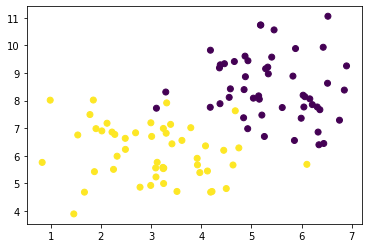

In [73]:
data, target = make_blobs(centers=2)
plt.scatter(data[:, 0], data[:, 1], c=target)

In [45]:
data.shape

(100, 2)

In [74]:
X = np.hstack((np.ones(shape=(100, 1)), data))

In [48]:
X.shape

(100, 3)

In [75]:
# 定义预测值
def sigmoid(theta):
    z = np.dot(X, theta)
    return 1 / (1 + np.exp(-z))

In [52]:
target

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [56]:
np.log(0)

d:\2101\.venv\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

In [76]:
# 定义损失.
def loss(y_true, y_pred):
    return -np.sum((y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))) / 100

In [80]:
# 梯度下降算法求损失最小的时候的theta
# theta初始化
theta = np.random.randn(3) * 0.01

learning_rate = 0.01

max_iter = 20000

i = 0

while True:
    y_proba = sigmoid(theta)

    # 更新theta
    dtheta = np.dot((y_proba - target), X) / 100
    theta = theta - learning_rate * dtheta
    
    i += 1
    if i % 100 == 0:
        y_proba = sigmoid(theta)
        # 设定阈值, 把概率转化为预测的类别.
        # >= 0.5就认为属于正例.
        y_pred = (y_proba >= 0.5)
        acc = (y_pred == target).mean()
        loss_ = loss(target, y_proba)
        print(f'第{i}次训练, 准确率: {acc}, 损失: {loss_}')
        
    if i > max_iter:
        break

第100次训练, 准确率: 0.58, 损失: 0.6378359654066281
第200次训练, 准确率: 0.66, 损失: 0.6150052048049612
第300次训练, 准确率: 0.68, 损失: 0.5997238601576474
第400次训练, 准确率: 0.69, 损失: 0.588497413180136
第500次训练, 准确率: 0.71, 损失: 0.5795431319107319
第600次训练, 准确率: 0.71, 损失: 0.57192118394646
第700次训练, 准确率: 0.71, 损失: 0.5651180795036884
第800次训练, 准确率: 0.73, 损失: 0.5588439213404677
第900次训练, 准确率: 0.73, 损失: 0.5529302874799228
第1000次训练, 准确率: 0.74, 损失: 0.5472768422855785
第1100次训练, 准确率: 0.75, 损失: 0.5418224341877452
第1200次训练, 准确率: 0.76, 损失: 0.536528963596716
第1300次训练, 准确率: 0.77, 损失: 0.5313721410871106
第1400次训练, 准确率: 0.78, 损失: 0.5263360762362314
第1500次训练, 准确率: 0.8, 损失: 0.5214100516606031
第1600次训练, 准确率: 0.8, 损失: 0.5165865711043611
第1700次训练, 准确率: 0.8, 损失: 0.5118601640664471
第1800次训练, 准确率: 0.8, 损失: 0.5072266465491218
第1900次训练, 准确率: 0.81, 损失: 0.5026826602738532
第2000次训练, 准确率: 0.82, 损失: 0.49822538365645286
第2100次训练, 准确率: 0.82, 损失: 0.493852349607082
第2200次训练, 准确率: 0.82, 损失: 0.4895613302125838
第2300次训练, 准确率: 0.82, 损失: 0.4853502635128769
第2400

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
logistic = LogisticRegression()
logistic.fit(data, target).score(data, target)

0.98